In [79]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [80]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
path = '/content/seeds_dataset.txt'

--2023-02-14 05:37:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [application/x-httpd-php]
Saving to: ‘seeds_dataset.txt.8’

seeds_dataset.txt.8 100%[===================>]   9.08K  --.-KB/s    in 0s      

2023-02-14 05:37:31 (91.6 MB/s) - ‘seeds_dataset.txt.8’ saved [9300/9300]



In [81]:

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # X = X.to_numpy()
    # y = y.to_numpy()
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')  

In [82]:
features = ['Area',
            'Perimeter',
            'Compactness',
            'Length of kernel',
            'Width of kernel',
            'Asymmetry coefficient',
            'Length of kernel groove.']

df = pd.read_csv(path, delimiter=r'[\t]+',
                 names=features + ['target'])
display(df)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove.,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [94]:
X = df.loc[:, features]
y = df.loc[:, 'target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


print('Labels counts in y:', np.bincount(y)[1:])
print('Labels counts in y_train:', np.bincount(y_train)[1:])
print('Labels counts in y_test:', np.bincount(y_test)[1:])

Labels counts in y: [70 70 70]
Labels counts in y_train: [57 54 57]
Labels counts in y_test: [13 16 13]


predicted: [3 2 1 1 3 2 2 2 2 3 1 3 3 3 2 2 3 2 1 1 3 2 1 1 2 2 2 2 3 3 2 3 1 2 3 3 3
 2 2 2 3 1]
true class: [1 2 1 1 3 2 2 2 2 3 1 3 1 3 2 2 3 1 1 1 3 1 1 1 2 2 2 2 3 3 2 3 2 2 3 3 3
 2 1 2 3 1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


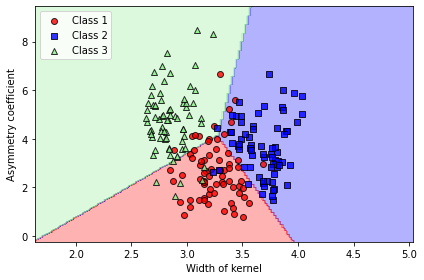

In [98]:
f_1=features[4]
f_2=features[5]
lr = LogisticRegression()
lr.fit(X_train.loc[:, [f_1, f_2]], y_train)
print('predicted:', lr.predict(X_test.loc[:, [f_1, f_2]]))
print('true class:', np.array(y_test))
plot_decision_regions(X.loc[:, [f_1, f_2]].to_numpy(), y, classifier=lr)
plt.xlabel(f_1)
plt.ylabel(f_2)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

predicted: [1 2 1 1 3 2 2 2 2 3 1 3 3 3 2 2 3 1 1 1 3 1 1 1 2 2 2 1 3 3 2 3 2 2 3 3 3
 2 1 1 3 1]
true class: [1 2 1 1 3 2 2 2 2 3 1 3 1 3 2 2 3 1 1 1 3 1 1 1 2 2 2 2 3 3 2 3 2 2 3 3 3
 2 1 2 3 1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


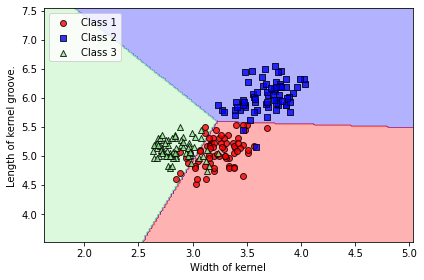

In [100]:
f_1=features[4]
f_2=features[6]
lr = LogisticRegression()
lr.fit(X_train.loc[:, [f_1, f_2]], y_train)
print('predicted:', lr.predict(X_test.loc[:, [f_1, f_2]]))
print('true class:', np.array(y_test))
plot_decision_regions(X.loc[:, [f_1, f_2]].to_numpy(), y, classifier=lr)
plt.xlabel(f_1)
plt.ylabel(f_2)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [85]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)


Accuracy:  0.9523809523809523
Confusion Matrix: 
 [[13  0  0]
 [ 2 14  0]
 [ 0  0 13]]
